# Assignment 8: Supervised Learning

This should be a straightforward assignment and is here just to provide a concrete example of supervised learning.

Load the titanic data set from `seaborn`. We will try to predict survival from the other variables.

In [1]:
import seaborn as sns
titanic = sns.load_dataset('titanic')

In [2]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


**Ex 1**. (10 points)

Is the data set balanced or imbalanced? If it is badly imbalanced (say minority class under 20% of total), use down-sampling of the majority class to generate a balanced data set. Drop columns with any missing values.

In [3]:
import pandas as pd
pd.DataFrame(titanic['survived'].value_counts())
#from the table below, the data set it not too imbalabced.

,survived
0,549
1,342


In [4]:
titanic_noMissing =titanic.dropna(axis=1)
titanic_noMissing

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True
5,0,3,male,0,0,8.4583,Third,man,True,no,True
6,0,1,male,0,0,51.8625,First,man,True,no,True
7,0,3,male,3,1,21.0750,Third,child,False,no,False
8,1,3,female,0,2,11.1333,Third,woman,False,yes,False
9,1,2,female,1,0,30.0708,Second,child,False,yes,False


The data set is not too imbalanced, so no action taken.

**Ex 2**. (10 points)

Convert the categorical values into dummy encoded variables , dropping the first value to avoid collinearity.

In [5]:
titanic_dummy = pd.get_dummies(titanic_noMissing,drop_first=True,columns=['sex','class','who','adult_male','alone'])
#Since 'pclass' and 'class' are the same, I just drop 'pclass' 
#same for alive and survived
titanic_dummy = titanic_dummy.drop(columns=['pclass','alive'])
titanic_dummy

,survived,sibsp,parch,fare,sex_male,class_Second,class_Third,who_man,who_woman,adult_male_True,alone_True
0,0,1,0,7.2500,1,0,1,1,0,1,0
1,1,1,0,71.2833,0,0,0,0,1,0,0
2,1,0,0,7.9250,0,0,1,0,1,0,1
3,1,1,0,53.1000,0,0,0,0,1,0,0
4,0,0,0,8.0500,1,0,1,1,0,1,1
5,0,0,0,8.4583,1,0,1,1,0,1,1
6,0,0,0,51.8625,1,0,0,1,0,1,1
7,0,3,1,21.0750,1,0,1,0,0,0,0
8,1,0,2,11.1333,0,0,1,0,1,0,0
9,1,1,0,30.0708,0,1,0,0,0,0,0


**Ex 3**. (10 points)

Split the data into 70% training and 30% test data sets using stratified sampling on the sex.

In [6]:
from sklearn.model_selection import train_test_split
male = titanic_dummy[titanic_dummy['sex_male']==1] #577 rows
female = titanic_dummy[titanic_dummy['sex_male']==0] #314 rows
maleX_train, maleX_test, maleY_train, maleY_test=train_test_split(male.drop(columns='survived'),list(male['survived']),test_size=0.3,random_state=888)
femaleX_train, femaleX_test, femaleY_train, femaleY_test=train_test_split(female.drop(columns='survived'),list(female['survived']),test_size=0.3,random_state=888)
x_train = pd.concat([maleX_train,femaleX_train])
x_test = pd.concat([maleX_test,femaleX_test])
y_train = maleY_train+femaleY_train
y_test = maleY_test+femaleY_test

**Ex 4**. 20 points)

Construct an `sklearn` `Pipeline` with the components `StandardScaler`, `RidgeClassifier`, and `GridSearchCV`. Train the Pipeline classifier, choosing a value for $\lambda$ from one of $\lambda = \{0, 0.1, 1, 10\}$ using grid search with 5-fold cross-validation. Note that the $\lambda$ parameter we use in the lecture is named `alpha` in `RidgeClassifier`.

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import GridSearchCV

parameters ={'alpha':[0,0.1,1,10]}
pipe = Pipeline([('sc',StandardScaler()),
                #('ridge', RidgeClassifier(alpha = λ)),
                ('cv',GridSearchCV(RidgeClassifier(),param_grid =parameters,scoring='roc_auc',cv=5))])
pipe.fit(x_train,y_train)
print('Test accuracy: %.3f' % pipe.score(x_test, y_test))

Test accuracy: 0.877


**Ex 5**. (10 points)

Using the trained classifier, construct a confusion matrix for the test and predicted values 

In [8]:
from sklearn.metrics import confusion_matrix
y_predict = pipe.predict(x_test)
conf_mat = confusion_matrix(y_test,y_predict)
conf_mat

array([[150,  23],
       [ 24,  72]])

**Ex 6**. (10 points)

Using the confusion matrix, calculate accuracy, sensitivity, specificity, PPV, NPV and F1 score 

In [9]:
tp,fp,fn,tn=conf_mat.ravel()
accuracy = (tp+tn)/(tp+fp+fn+tn)
sensitivity = tp/(tp+fn) #recall
specifity = tn/(fp+tn)
PPV = tp/(tp+fp) #precision
NPV = tn/(fn+tn)
F1 = (2*tp)/(2*tp+fn+fp)
print('accuracy =',accuracy)
print('sensitivity =',sensitivity)
print('specifity =',specifity)
print('PPV =',PPV)
print('NPV =',NPV)
print('F1 score =',F1)

accuracy = 0.8252788104089219
sensitivity = 0.8620689655172413
specifity = 0.7578947368421053
PPV = 0.8670520231213873
NPV = 0.75
F1 score = 0.8645533141210374


Routine

**Ex 7**.  (10 points)

Plot an ROC curve for the classifier

Text(0,0.5,'TPR')

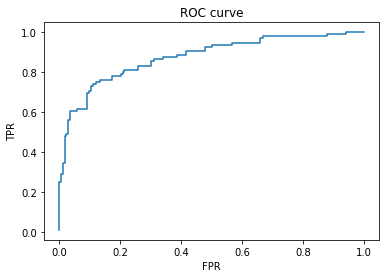

In [10]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
y_score = pipe.decision_function(x_test)
fpr, tpr, thresholds=roc_curve(y_test,y_score)
plt.step(fpr, tpr, where='post')
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')

**Ex. 8** (20 points)

- Fit polynomial curves of order 0,1,2,3,4 and 5 to the values of $X$, $y$ given below 
- Using LOOCV, what is the degree of the best-fitting polynomial model? If this is not the true degree, explain why.

In [13]:
import numpy as np

In [14]:
np.random.seed(23)

n = 10
k = 3
x = np.random.normal(0,1,n)
X = np.c_[np.ones(n), x, x**2, x**3]
beta = np.random.normal(0, 1, (k+1,1))
s = 0.5
y = X@beta
y += np.random.normal(0, s, y.shape)

In [15]:
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
degree = [0,1,2,3,4,5]
loo = LeaveOneOut()
best_degree = -1
min_mse = float('inf')

for i in degree:
    poly = PolynomialFeatures(degree = i)
    for train_index, test_index in loo.split(x):
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]
    poly_x_train = poly.fit_transform(x_train.reshape(-1,1))
    poly_x_test = poly.fit_transform(x_test.reshape(-1,1))
    model = LinearRegression().fit(poly_x_train,y_train)
    y_pred = model.predict(poly_x_test)
    
    temp_mse = mean_squared_error(y_test, y_pred)
    if temp_mse<min_mse:
        min_mse = temp_mse
        best_degree = i
        
best_degree

2